# **1.cargar importaciones y dataset**

In [ ]:
#Las importaciones necesarias
import numpy as np
import pandas as pd # Estructura y manipulación de datos
import matplotlib.pyplot as plt # Graficos
from matplotlib import style # Si va
import seaborn as sns # diseño de Graficos

#---- Importaciónes de scikit learn ----

from sklearn.preprocessing import MinMaxScaler  # Con esta importacion, podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1
from sklearn.preprocessing import LabelEncoder # Para transformar datos categoricos a formato numerico

from sklearn.linear_model import LinearRegression # con esta libreria podemos saber sobre problemas de clasificacion, regresion  y clustering () modelo lineal etc
from sklearn.model_selection import train_test_split

#---- Metricas de modelos de regresión ----

from sklearn.metrics import r2_score # solo lo ocuparemos para problemas de regresion o todo lo que sea numerico
from sklearn.metrics import mean_squared_error #solo para la parte numerica, con esto vamos a poder sumar y sacar el promedio del los datos o el error
from sklearn.metrics import mean_absolute_error

#---- Importaciones para el modelo de random forest regresion ----

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#from imblearn.combine import SMOTETomek #para generar el balance de clases, internamente internamente los datos, tambien funciona para regresion

#---- Para encontrar los mejores parametros ----
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.Preparacion de los datos**

## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

Eliminacion de columas
- **Unnamed 0:** no tendra un uso dentro de nuestro analisis y para las siguiente etapas.
- **AbnormalMatch:** esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas.
- **FirstKillTime:** FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas.
- **TimeAlive y TravelledDistance**: Estas variables no podran ser usadas debido al formato que presenta para el modelo.


In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**

trataremos de trasformar y arreglar variables que no son numericos, cambiar formatos  para poder utilizar despues  para preparar el modelado utilizando scaler

* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding
El label encoding nos ayudara a transformar los
datos categóricos **Team** y **Map** en un formato numérico como beneficio a posibles modelos de machine learning.

In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-11-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


- Se realiza una transformacion en los datos que contenga valores de tipo **TRUE** o **FALSE** a valores **numericos** con el proposito de realizar modelos que requieran de estos tipos de datos. Ademas, con esto, ayudara o benecifiar el procesamiento de los datos optimizando la velocidad y eficientiza.

In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **Random Forest Regression**

### Conceptos basicos del modelo de Random Forest

- Crearemos particiones o nodos en la que se separaran de manera condicional.

- Nodo inicial: llamado es llamado raíz (root)

- Nodos internos: dividen los datos basandose en codiciones > o <. Pueden tener hijos o mas.

- Hojas: Donde no hay mas particiones

RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Funciones pre-definidas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Funciones personalizadas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

### Separación de los datos: entrenamiento y prueba

In [ ]:
X = df_backup[["Map","Team",'TeamStartingEquipmentValue']]
y = df_backup['RoundStartingEquipmentValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Modelo y metricas iniciales

In [ ]:
mo2 = RandomForestRegressor(n_estimators=100, random_state=42)
mo2.fit(X_train, y_train)
Yhat = mo2.predict(X_test)
mse = mean_squared_error(y_test, Yhat)
mae = mean_absolute_error(y_test, Yhat)
root_mean_squared_error = np.sqrt(mse)
R2 = r2_score(y_test, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",root_mean_squared_error)
print("R^2: ",R2)

MSE:  761462.347602869
MAE:  547.4086504675244
RMSE:  872.6180995159733
R^2:  0.8287771166691265


## Hiperparámetros
Aquí realizaremos los dos metodos para encontrar los mejores parametros para nuestro modelo de bosque aleatorio.

- El primer metodo nos ayudara a ver todos los parametros y convinaciónes posibles a detalle

- El segundo metodo selecciona los mejores parametros directamente

## Primer metodo para encontrar los mejores Hiperparámetros


In [ ]:

model = RandomForestRegressor() #creamos el modelo

params = {
    'max_depth': np.arange(3,6),
    'min_samples_split': np.arange(2,5)
}
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.851150408832748
{'max_depth': np.int64(5), 'min_samples_split': np.int64(4)}


{'max_depth': 5, 'min_samples_split': 2}


Estos parametros nos indica
**max_depth :** Cantidad de ramas o profundidad maxima del arbol.

**min_samples_split:** cantidad de divisiones de un nodo interno


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.610283,0.276908,0.035337,0.003438,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.850447,0.851974,0.839087,0.839948,0.842616,0.847131,0.840127,0.843725,0.841269,0.842929,0.843925,0.004255,9
1,1.529308,0.185452,0.034172,0.005385,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.850654,0.851957,0.838979,0.840010,0.842690,0.847259,0.840184,0.843821,0.841139,0.843001,0.843969,0.004299,8
2,1.524287,0.200923,0.035486,0.003227,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.850571,0.851958,0.838827,0.840011,0.842743,0.847158,0.840255,0.843902,0.841341,0.843302,0.844007,0.004270,7
3,1.922388,0.292127,0.042438,0.005722,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.856771,0.856778,0.844936,0.847485,0.848514,0.853909,0.847725,0.848366,0.849246,0.848405,0.850214,0.003895,4
4,1.823893,0.230395,0.041731,0.005528,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.856673,0.856824,0.844821,0.847564,0.848539,0.853832,0.847901,0.848246,0.849169,0.848379,0.850195,0.003887,6
5,1.910115,0.261612,0.042033,0.004384,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.856559,0.856985,0.844933,0.847411,0.848554,0.853822,0.847723,0.848465,0.849234,0.848311,0.850200,0.003892,5
6,2.069884,0.221954,0.049060,0.005446,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.858071,0.857415,0.845959,0.848502,0.849310,0.854145,0.849246,0.849267,0.850523,0.848948,0.851139,0.003819,2
7,2.168888,0.321543,0.047426,0.003203,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.858004,0.857440,0.845981,0.848474,0.849227,0.854081,0.849289,0.849365,0.850455,0.848866,0.851118,0.003808,3
8,2.165090,0.263646,0.048440,0.004642,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.857988,0.857399,0.845962,0.848532,0.849326,0.854004,0.849377,0.849413,0.850584,0.848920,0.851150,0.003775,1


### Asignando el modelo como parametro ded max_depth y el parametro de min_samples

In [ ]:
modelo = RandomForestRegressor(max_depth=5, min_samples_split=2)

## Segundo metodo para encontrar los mejores Hiperparámetros

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8511795863984576
{'max_depth': np.int64(5), 'min_samples_split': np.int64(3)}


In [ ]:
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

,7
mean_fit_time,2.16857
std_fit_time,0.318255
mean_score_time,0.049875
std_score_time,0.00516
param_max_depth,5
param_min_samples_split,3
params,"{'max_depth': 5, 'min_samples_split': 3}"
split0_test_score,0.858005
split1_test_score,0.857442
split2_test_score,0.846048


### Visualización del arbol con profundidad de 5 y de division de 2 nodos

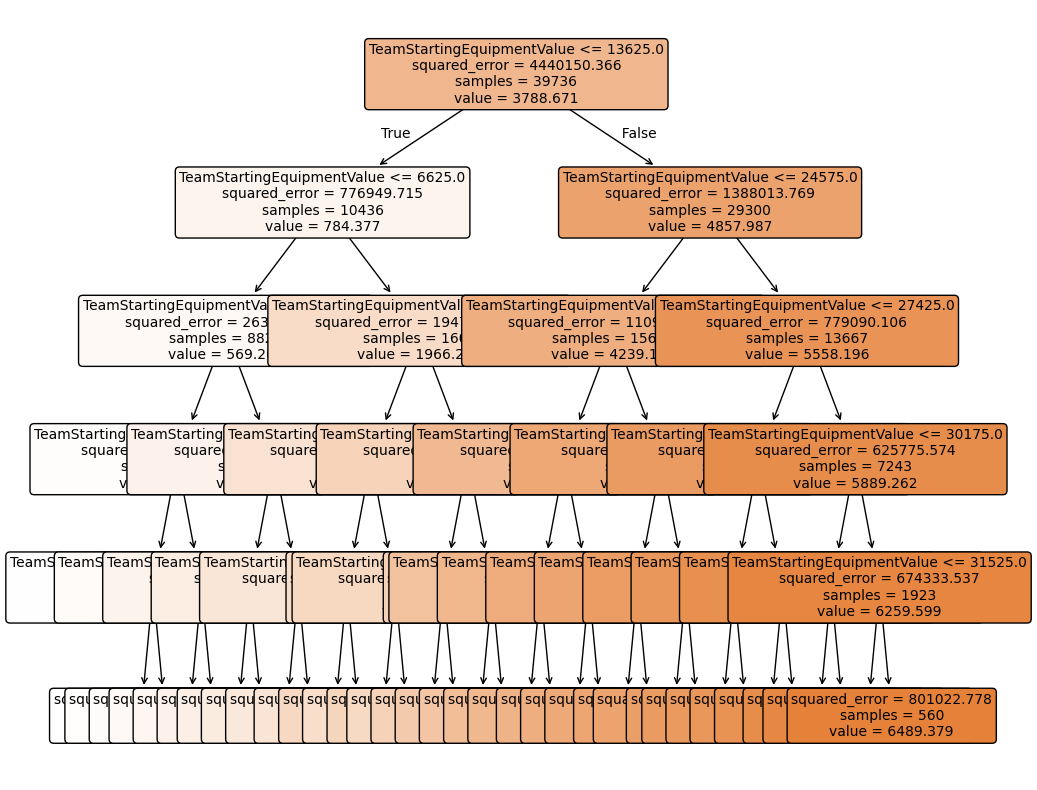

In [ ]:


plt.subplots(1,1,figsize=(10,10))
a = tree.plot_tree(grid.best_estimator_.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=10) # Changed grid.best_estimator_ to grid.best_estimator_.estimators_[0] to plot one of the trees in the forest

### Visualizando

--- Metricas del mejor modelo  ---
Mean Squared Error (MSE): 653480.7060227396
Mean Absolute Error (MAE): 513.0434576361347
Root Mean Squared Error (RMSE): 808.381534934303
R2 Score: 0.8530579338052002


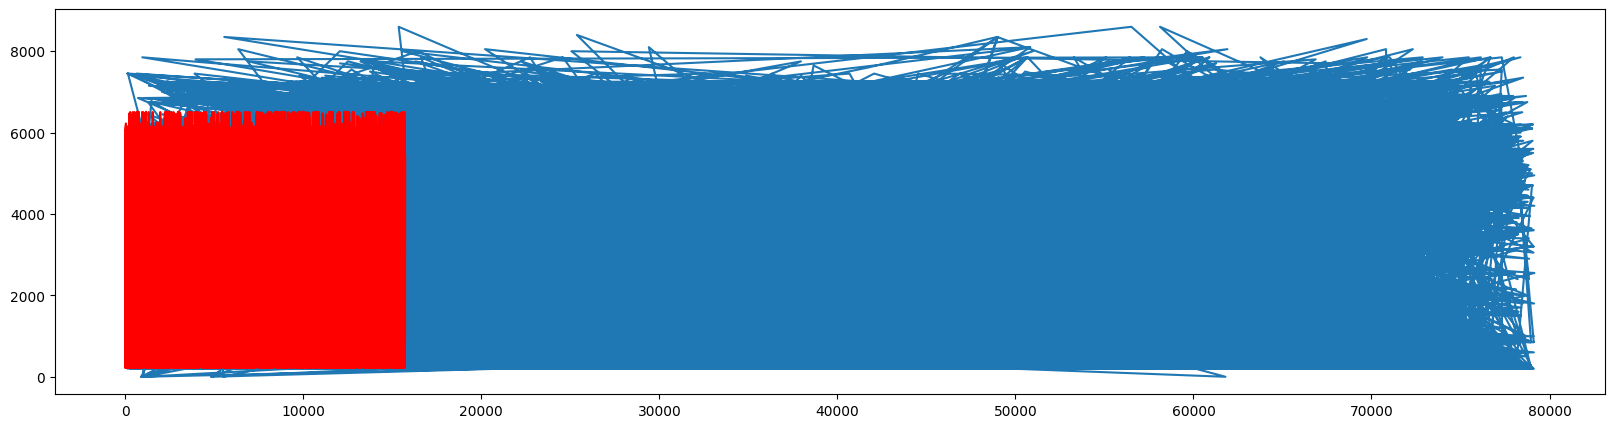

In [ ]:
# Yhat = predicciones
Yhat = grid.predict(X_test)

# Evalúa el mejor modelo
mse_best = mean_squared_error(y_test, Yhat)
mae_best = mean_absolute_error(y_test, Yhat)
r2_best = r2_score(y_test, Yhat)
rmse_best = np.sqrt(mse_best)

print("--- Metricas del mejor modelo  ---")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R2 Score: {r2_best}")

plt.subplots(figsize=(20,5))
plt.plot(y_test)
plt.plot(Yhat, 'r')


# **Resultado del Modelo**

* MSE:  761462.347602869
* MAE:  547.4086504675244
* RMSE:  872.6180995159733
* R^2:  0.8287771166691265

**observacion:**

El modelo tiene un RMSE de 872 y un MAE de 547, con un R² cercano a 0.82, lo que significa que logra explicar alrededor del 82% de la variación de los datos. Si bien muestra un pequeño aumento en el error y una leve baja en el ajuste respecto al modelo anterior, sigue ofreciendo resultados confiables y un desempeño bastante aceptable para el objetivo planteado.


# **Resultado del gridseachcv**



* MSE: 768538.5479101434
* MAE: 548.8527913619145
* RMSE: 876.663303617839
* R^2: 0.8271859579946989

**observacion:**

Con el ajuste mediante GridSearchCV, el modelo logró un RMSE de 876 y un MAE de 548, junto a un R² de 0.82, mejorando notablemente frente al modelo anterior que tenía un RMSE de 876 y un R² de 0.82. Esto refleja una reducción del error y un aumento en la capacidad de explicar la variación de los datos, mostrando que la optimización efectivamente mejoró el desempeño del modelo, haciéndolo más preciso y ajustado a la realidad.